# EXPLORATORY DATA ANALYSIS

We will be exploring a given dataset to learn the main characteristics of the data and see what we can deduce from them using visual explorations.

The Dataset we will be exploring is from Kaggle datasets on Employee Retention (https://www.kaggle.com/gummulasrikanth/hr-employee-retention)

# OBJECTIVES
- We want to discover the major factors contributing to who stays or leaves in the company.
- Train a Classifier modl that will be able to tell based on the available data if the employee will stay or will be leaving.

## About the Dataset
Let's have a look at the fields in the dataset.
- Satisfaction level
- Last evaluation
- Number of projects
- Average monthly hours
- Time spent in the company
- Work Accidents
- Left
- Promotions in the last 5 years
- Departments
- Salary

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
#Loading the Dataset
#Lets have a look at the first 5 and last rows
hr = pd.read_csv("HR_comma_sep.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


We can see the first and the last 5 cells of the dataset

In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


## WHAT DO WE KNOW ABOUT THE DATA AT HAND?

In [5]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


- Great to know that only 23.8% which is close to 24% of the employee left.
- As of the satisfaction level, 61.28% of the employee were satisfied, does it mean that the over 38% of the employee who were not satisfied left?
- 14.46% had experienced work related Accidents, but were not to be compared to the 24% that left within the period in review.
- It suffices to say there is a cluster of employees who are not so satisfied and left because other reasons other than work related accidents.

In [20]:
# Total number of empployee that left
hr["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [22]:
#total number of employee that had work relate accidents?
hr["Work_accident"].value_counts()

0    12830
1     2169
Name: Work_accident, dtype: int64

In [23]:
#Number of employee that has been promoted in the past 5 years
hr["promotion_last_5years"].value_counts()

0    14680
1      319
Name: promotion_last_5years, dtype: int64

In [24]:
#Time spent in the company
hr["time_spend_company"].value_counts(())

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

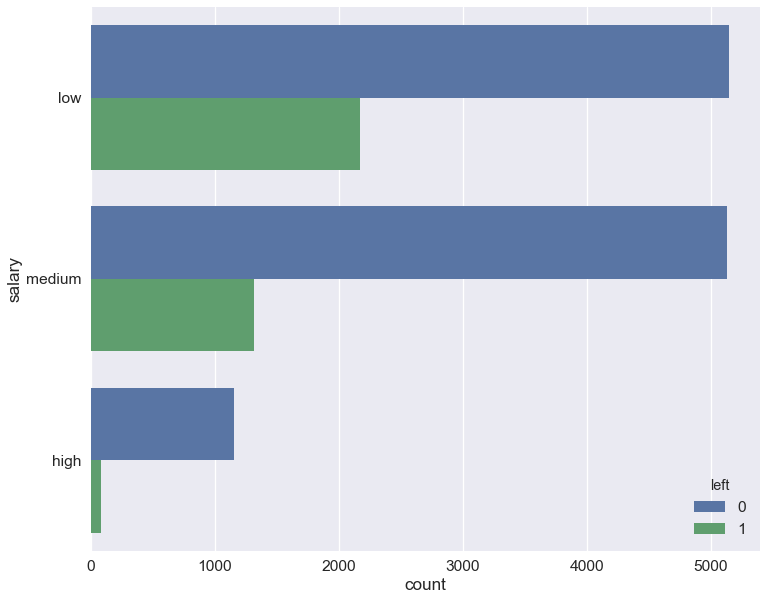

In [51]:
# Let's look at the Salary category of the data and see how it has been distributed

sb.countplot(y="salary", hue='left', data=hr)

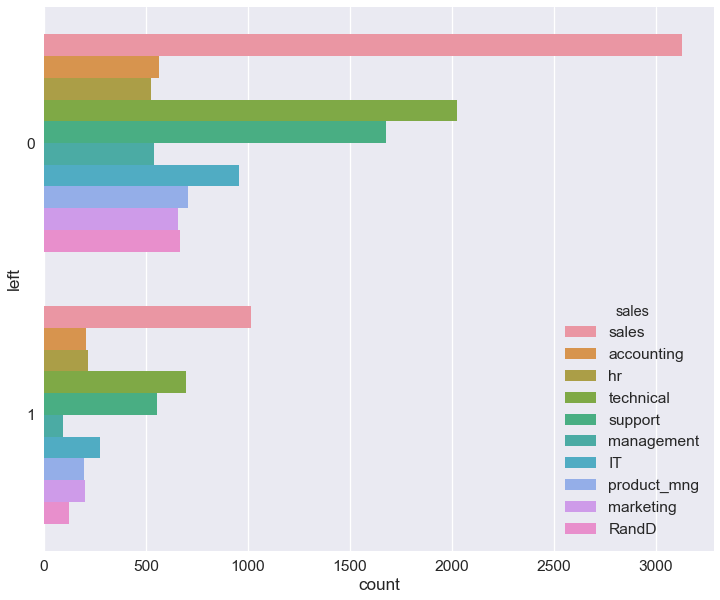

In [73]:
#Exploring the relationship between the various departments and the empployees that had left.

sb.countplot(y="left", hue='sales', data=hr)

In [52]:
hr["salary"].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

We can see that salary also played a role in determining the number of people that left in the past 5 years.
As the salary rewards increased, we saw that the number of people who left decreased and those earning higher had the least of number of people who left.

In [25]:
#Number of projects completed by the employee in question
hr["number_project"].value_counts()

4    4365
3    4055
5    2761
2    2388
6    1174
7     256
Name: number_project, dtype: int64

#### WHAT WE KNOW ABOUT THE DATA THAT HAD HAPPENED IN THE PAST 5 YEARS
    - 3571 of the employees had left.
    - 2169 had work related accidents
    - 319 had been promoted
    - 6443 of the employees had been there for 4 years
    - 3244 of the employees had worked there for 3 years
    - 1473 of the employees had worked there for 5 years
    - 718 had worked for 6 years.
    - 214 had worked for 10 years.
    - 188 had worked for 7 years.
    - 162 had worked for 8 years.
We can assume from the data that there has been no recent recruit recorded nor any of the employee whom had worked there for less than 3 years
#### Also,
    - 4365 of the employee had completed 4 projects
    - 4055 of the employee had completed 3 projects
    - 2751 of the employee had completed 5 projects
    - 2388 of the employee had completed 2 projects
    - 1174 of the employee had completed 6 projects
    - 256 of the employee had completed 7 projects

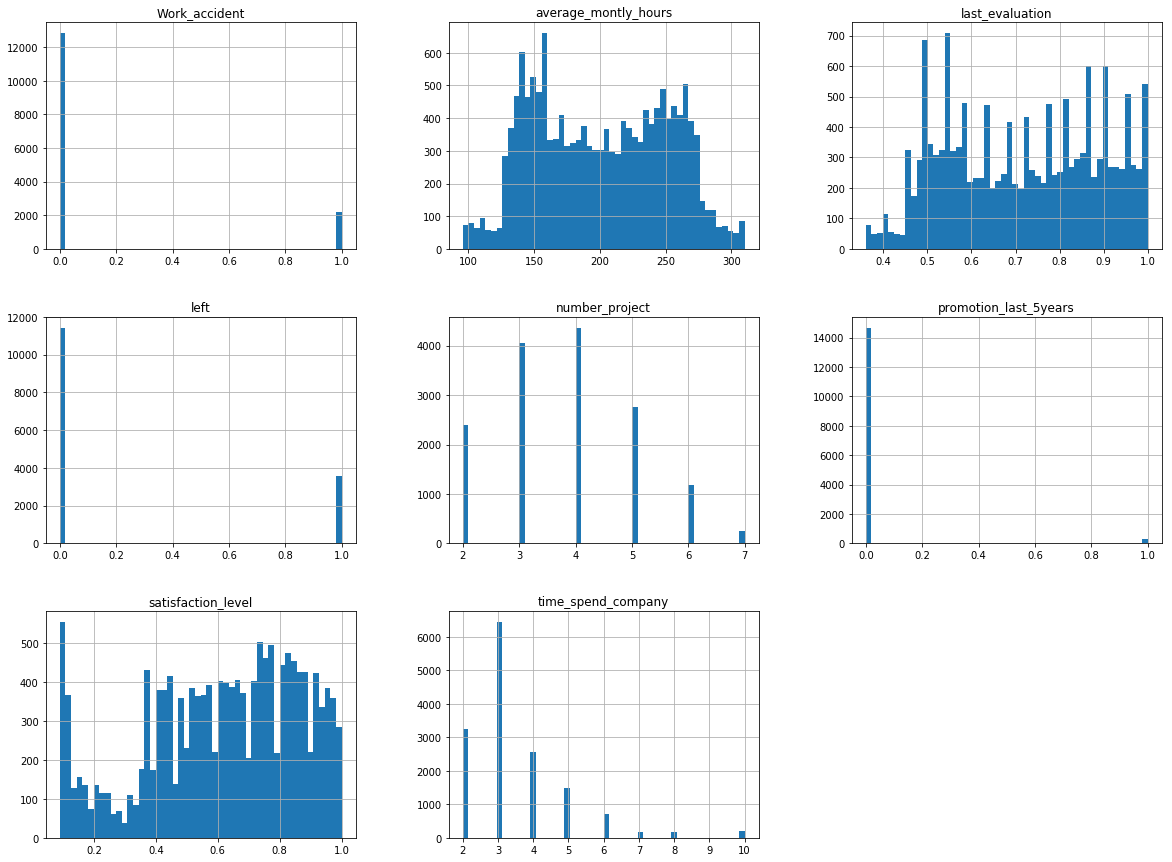

In [6]:
%matplotlib inline
hr.hist(bins=50, figsize=(20,15))
plt.show()

Since we know we have some categorical data, let's start importing DataFrames that will handle these type of data

In [29]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [31]:
#How many people belonged to the various departments
hr["sales"].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

We can see from the above data, there are 10 departments in the organization. we can also see the distribution of the various workforces in the organization.

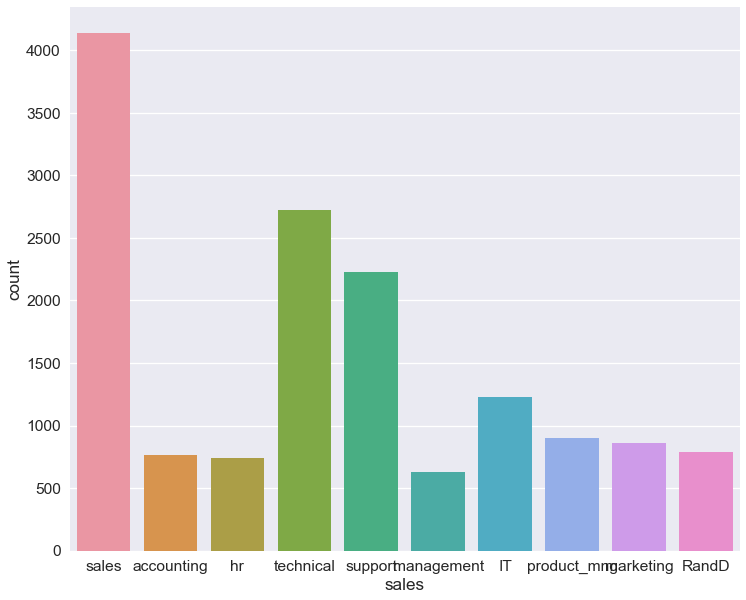

In [49]:
import seaborn as sb

sb.countplot(hr["sales"])

In [7]:
# Splitting the Datasets into Training and Test data.
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(hr, test_size=0.2, random_state=42)

In [10]:
#Looking for possible correlation patterns in the datasets

corr_matrix = hr.corr()
corr_matrix["left"].sort_values(ascending=False)

left                     1.000000
time_spend_company       0.144822
average_montly_hours     0.071287
number_project           0.023787
last_evaluation          0.006567
promotion_last_5years   -0.061788
Work_accident           -0.154622
satisfaction_level      -0.388375
Name: left, dtype: float64

We can see that Satisfaction level and work accidents have the strongest negative correlation, while the time spent in the company also have strong positive correlation.
Last evaluation has the least correlation with the data.

In [11]:
#Heatmap for the correlation matrix
import seaborn as sb

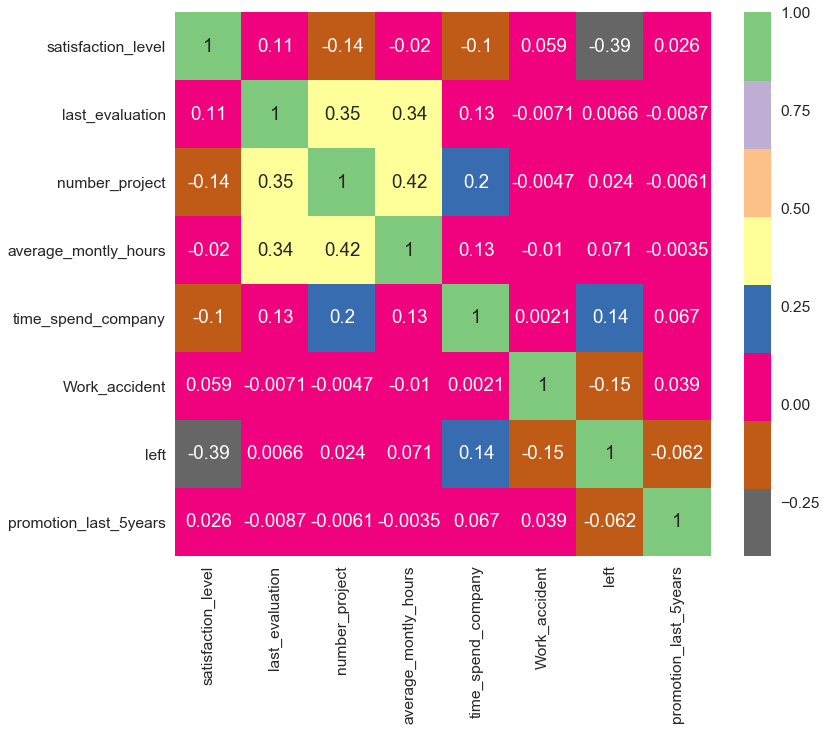

In [14]:
sb.set(rc={'figure.figsize':(12,10)})
sb.set_context("talk", font_scale=1.2)
    
sb.heatmap(corr_matrix, cmap='Accent_r', annot=True)

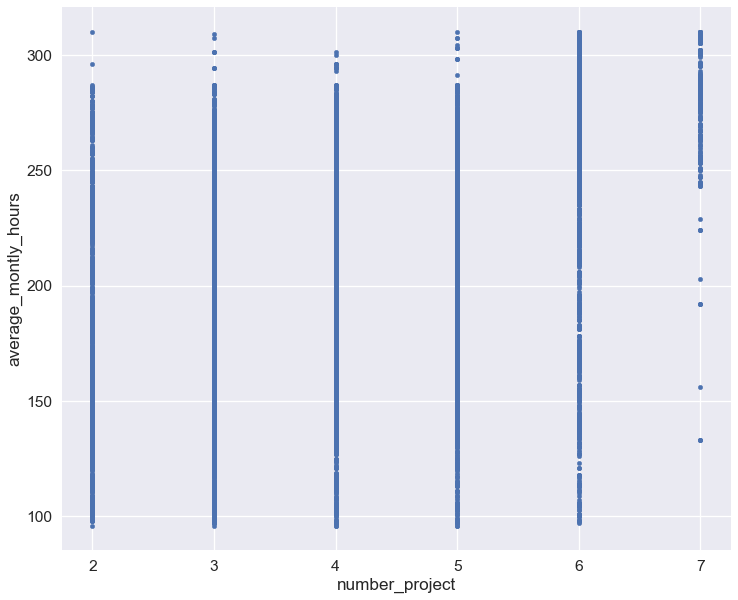

In [71]:
#Plotting the columns with the strongest correlation from the heatmap

hr.plot(kind="scatter", x="number_project", y="average_montly_hours")

## DATA CLEANING FOR MACHINE LEARNING ALGORITHMS

#### HAVING GONE THROUGH THE DATA, WHAT WE DEDUCED.
    - There are no columns with missing values, there will no need for filling, dropping any column due to missing data.
    - most of the columns are categorical, so our major task will be to convert the categorical data into OneHotEncoders for machine learning. That will be our Preprocessing operations.
We will be employing a few Future encoders package from Ageron's Handson Machine Learning to convert our categorical data into Computer readable format.

In [27]:
%run future_encoders

In [28]:
# From Hands on Machine learning by Ageron
class MostFrequentImputer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        self.most_frequent_ = pd.Series([X[c].value_counts().index[0] for c in X],
                                        index=X.columns)
        return self
    def transform(self, X, y=None):
        return X.fillna(self.most_frequent_)

Building a Pipeline for the categorical attributes and using OneHotEncoders to convert them to one-hot vector.

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import Imputer

cat_pipeline = Pipeline([
    ("select_cat", DataFrameSelector(["number_project", "time_spend_company", "Work_accident", "promotion_last_5years", "sales", "salary"])),
    ("imputer", MostFrequentImputer()),
    ("cat_encoder", OneHotEncoder(sparse=False))
])

In [35]:
cat_pipeline.fit_transform(train_set)

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 1., 0.]])

Building pipeline for the numerical attributes


In [38]:
imputer = Imputer(strategy="median")

num_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(["satisfaction_level", "last_evaluation", "average_montly_hours"])),
    ("imputer", Imputer(strategy="median")),
])

In [39]:
num_pipeline.fit_transform(train_set)

array([[1.00e+00, 6.10e-01, 1.88e+02],
       [1.60e-01, 7.80e-01, 1.96e+02],
       [8.00e-01, 8.00e-01, 1.75e+02],
       ...,
       [6.60e-01, 7.30e-01, 2.49e+02],
       [7.90e-01, 1.00e+00, 2.18e+02],
       [9.80e-01, 8.60e-01, 2.19e+02]])

Let's join our numerical and categorical pipelines together for machine learning

In [41]:
from sklearn.pipeline import FeatureUnion
preprocess_pipeline = FeatureUnion(transformer_list=[
    ("num_pipeline", num_pipeline),
    ("cat_pipeline", cat_pipeline),
])

We now have a preprocessing pipeline, that is convertig our raw data into numerical inputs that can now be feed into any machine learning model

In [42]:
X_train = preprocess_pipeline.fit_transform(train_set)
X_train

array([[1.00e+00, 6.10e-01, 1.88e+02, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [1.60e-01, 7.80e-01, 1.96e+02, ..., 1.00e+00, 0.00e+00, 0.00e+00],
       [8.00e-01, 8.00e-01, 1.75e+02, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       ...,
       [6.60e-01, 7.30e-01, 2.49e+02, ..., 0.00e+00, 0.00e+00, 1.00e+00],
       [7.90e-01, 1.00e+00, 2.18e+02, ..., 0.00e+00, 1.00e+00, 0.00e+00],
       [9.80e-01, 8.60e-01, 2.19e+02, ..., 0.00e+00, 1.00e+00, 0.00e+00]])

Let's get our label

In [43]:
y_train = train_set["left"]

#### LET'S TRAIN AN SVC MODEL 

In [44]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Great! We now have a trained SVC model, before we can be able to make predictions. We have to also preprocess our test_set using the pipeline we have built

In [47]:
X_test = preprocess_pipeline.transform(test_set)
y_pred = svm_clf.predict(X_test)

Using Cross-validatition to check how well our model performed.

In [46]:
from sklearn.model_selection import cross_val_score

svm_scores = cross_val_score(svm_clf, X_train, y_train, cv=10)
svm_scores.mean()

0.9476625372077805

Wow! our model actually performed very well, with 94.7% accuracy.
Why not we try another model RandomForest an see what that gives us

In [48]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)
forest_scores = cross_val_score(forest_clf, X_train, y_train, cv=10)
forest_scores.mean()

0.987749784201239

That is even much better, as we are seeing a 98.7% accuracy with this model.

In [68]:
some_data = hr.iloc[:10]
some_labels = test_set.iloc[:10]
some_data_prepared = preprocess_pipeline.transform(some_data)

print("Predictions:", svm_clf.predict(some_data_prepared))

Predictions: [1 1 1 1 1 1 1 1 1 1]


In [67]:
test_set.iloc[:10]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
6723,0.65,0.96,5,226,2,1,0,0,marketing,medium
6473,0.88,0.80,3,166,2,0,0,0,IT,low
4679,0.69,0.98,3,214,2,0,0,0,sales,low
862,0.41,0.47,2,154,3,0,1,0,sales,low
7286,0.87,0.76,5,254,2,1,0,0,hr,low
8127,0.72,0.88,3,224,3,0,0,0,technical,low
3017,0.98,0.78,4,155,3,1,0,0,technical,low
3087,0.17,0.76,4,280,5,0,0,0,hr,low
6425,0.20,0.98,4,166,4,1,0,0,sales,medium
2250,0.16,0.90,5,258,3,0,0,0,technical,medium


In [69]:
hr.iloc[:10]

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


# CONCLUSIONS

Employees will leave when:
- They are not adequately compensated as we saw from the charts that most employees in the low income brackets left more often.
- Sales is the department with the highest number of workforce and also represents the department with the highest number of employee leaving the company in the past 5 years.

We used Support Vector Classifier and RandomForest Classifier to trian our data and we saw that the RandomForest had more accuracy in predicting our model.

If you have a better model, or you saw something I totally missed out, please be nice and share with me, am earger to learn new things.

